# Air Resistance
### Jack Farmer, 3 October 2023

In [50]:
from array import array
import numpy as np
import math
import matplotlib.pyplot as plt

# Initial Conditions
speed = 55.8
theta = np.linspace(20.0, 50.0, 300)
y1 = 0.0


# Other constants - golf ball - D = 0.0427m, m = 0.04593kg
Cd = 0.20 # drag coefficient
area = 0.001432 # cross sectional area of projectile
grav = 9.81 # gravitional acceleration
mass = 0.04593 # mass in kg
rho = 1.225 # density of air (kg/m^3)
air_const = -0.5*Cd*rho*area/mass
Pi = math.pi

rnge = []

rnge_theoretical = []

for th in theta:
    r1 = array('d')
    v1 = array('d')
    r = array('d')
    v = array('d')
    accel = array('d')
    
    r1.append(0)
    r1.append(y1)
    v1.append(speed*math.cos(th*Pi/180.0))
    v1.append(speed*math.sin(th*Pi/180.0))
    
    r.append(r1[0])
    r.append(r1[1])
    v.append(v1[0])
    v.append(v1[1])
    accel.append(0)
    accel.append(0)
    
    # Setup arrays for Euler and Euler-Cromer Methods
    re = array('d')
    ve = array('d')
    accele = array('d')
    
    re.append(r1[0])
    re.append(r1[1])
    ve.append(v1[0])
    ve.append(v1[1])
    accele.append(0)
    accele.append(0)
    
    rec = array('d')
    vec = array('d')
    accelec = array('d')
    
    rec.append(r1[0])
    rec.append(r1[1])
    vec.append(v1[0])
    vec.append(v1[1])
    accelec.append(0)
    accelec.append(0)
    
    tau = 0.0002 # timestep in seconds
    maxStep = 1000000 # maximum number of steps
    
    xplot = array('d')
    yplot = array('d')
    xplote = array('d')
    yplote = array('d')
    xplotec = array('d')
    yplotec = array('d')
    xNoAir = array('d')
    yNoAir = array('d')
    time = array('d')
    timee = array('d')
    timeec = array('d')
    timeNoAir = array('d')
    
    endtime = 0
    nelements = 0
    iStep = 1
    while(iStep < maxStep):
        iStep += 1
        t = (iStep-1)*tau
        
        xplot.append(r[0])
        yplot.append(r[1])
        xplote.append(re[0])
        yplote.append(re[1])
        xplotec.append(rec[0])
        yplotec.append(rec[1])
        xNoAir.append(r1[0]+v1[0]*t)
        yNoAir.append(r1[1]+v1[1]*t-0.5*grav*t*t)
    
        timeNoAir.append(t)
        time.append(t)
        timee.append(t)
        timeec.append(t)
    
        # Euler Method
        normVe = math.sqrt(ve[0]*ve[0]+ve[1]*ve[1])
        accele[0]=air_const*normVe*ve[0]
        accele[1]=air_const*normVe*ve[1]-grav
        re[0] = re[0] + tau*ve[0]
        re[1] = re[1] + tau*ve[1]
        ve[0] = ve[0] + tau*accele[0]
        ve[1] = ve[1] + tau*accele[1]
    
        # Euler-Cromer Method
        normVec = math.sqrt(vec[0]*vec[0]+vec[1]*vec[1])
        accelec[0]=air_const*normVec*vec[0]
        accelec[1]=air_const*normVec*vec[1]-grav
        vec[0] = vec[0] + tau*accelec[0]
        vec[1] = vec[1] + tau*accelec[1]    
        rec[0] = rec[0] + tau*vec[0]
        rec[1] = rec[1] + tau*vec[1]
        
               # MidPoint Method
        normV = math.sqrt(v[0]*v[0]+v[1]*v[1])
        accel[0]=air_const*normV*v[0]
        accel[1]=air_const*normV*v[1]-grav
        vxnew = v[0] + tau*accel[0]
        vynew = v[1] + tau*accel[1]
        r[0] = r[0] + tau*(v[0] + vxnew)/2.0
        r[1] = r[1] + tau*(v[1] + vynew)/2.0
        v[0] = vxnew
        v[1] = vynew    
    
        if (r[1] < 0 and v[1] < 0):
            xplot.append(r[0])
            yplot.append(r[1])
            xplote.append(re[0])
            yplote.append(re[1])
            xplotec.append(rec[0])
            yplotec.append(rec[1])
            time.append(tau*iStep)
            timee.append(tau*iStep)
            timeec.append(tau*iStep)
            endtime = tau*iStep
            nelements = iStep
            break
    rnge.append(r[0])
    rnge_theoretical.append(speed*speed/grav*math.sin(2.0*th*Pi/180.0))
    

max_y = np.amax(yNoAir)+1
max_x = np.amax(xNoAir)+1
max_t = np.amax(time)+1


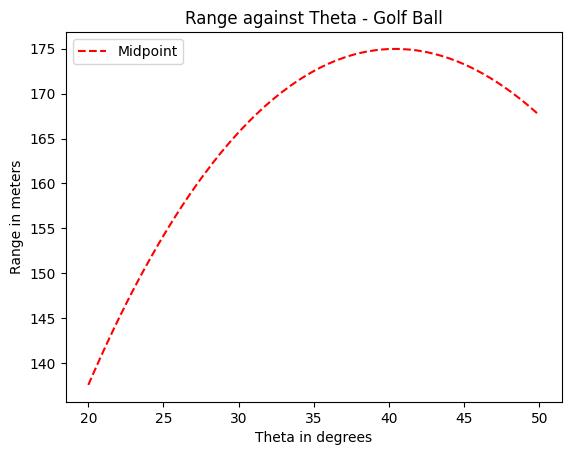

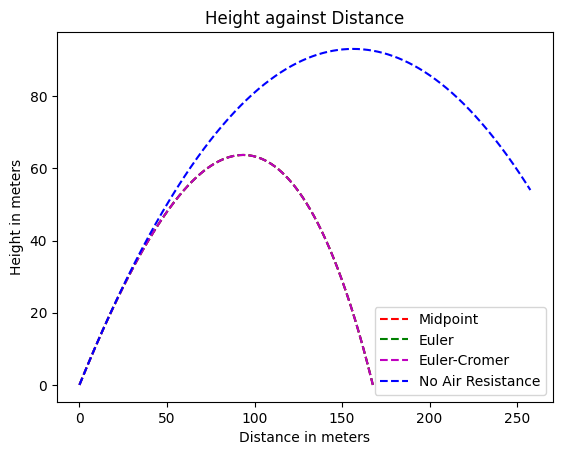

In [51]:
plt.plot(theta, rnge, 'r--', label="Midpoint")
plt.xlabel("Theta in degrees")
plt.ylabel("Range in meters")
plt.title("Range against Theta - Golf Ball")
plt.legend()
plt.show()

plt.plot(xplot, yplot, 'r--', label="Midpoint")
plt.plot(xplote, yplote, 'g--', label="Euler")
plt.plot(xplotec, yplotec, 'm--', label="Euler-Cromer")
plt.plot(xNoAir, yNoAir, 'b--', label="No Air Resistance")
plt.xlabel("Distance in meters")
plt.ylabel("Height in meters")
plt.title("Height against Distance")
plt.legend()
plt.show()

In [39]:
# Initial Conditions
speed = 44.704
theta = np.linspace(20.0, 50.0, 300)
y1 = 1.0

Pi = math.pi

# Other constants - baseball
Cd = 0.30 # drag coefficient
area = Pi * (0.074 / 2.0)**2 # cross sectional area of projectile
grav = 9.81 # gravitional acceleration
mass = 0.1455 # mass in kg
rho = 1.225 # density of air (kg/m^3)
air_const = -0.5*Cd*rho*area/mass


rnge = []

rnge_theoretical = []

for th in theta:
    r1 = array('d')
    v1 = array('d')
    r = array('d')
    v = array('d')
    accel = array('d')
    
    r1.append(0)
    r1.append(y1)
    v1.append(speed*math.cos(th*Pi/180.0))
    v1.append(speed*math.sin(th*Pi/180.0))
    
    r.append(r1[0])
    r.append(r1[1])
    v.append(v1[0])
    v.append(v1[1])
    accel.append(0)
    accel.append(0)
    
    # Setup arrays for Euler and Euler-Cromer Methods
    re = array('d')
    ve = array('d')
    accele = array('d')
    
    re.append(r1[0])
    re.append(r1[1])
    ve.append(v1[0])
    ve.append(v1[1])
    accele.append(0)
    accele.append(0)
    
    rec = array('d')
    vec = array('d')
    accelec = array('d')
    
    rec.append(r1[0])
    rec.append(r1[1])
    vec.append(v1[0])
    vec.append(v1[1])
    accelec.append(0)
    accelec.append(0)
    
    tau = 0.0002 # timestep in seconds
    maxStep = 1000000 # maximum number of steps
    
    xplot = array('d')
    yplot = array('d')
    xplote = array('d')
    yplote = array('d')
    xplotec = array('d')
    yplotec = array('d')
    xNoAir = array('d')
    yNoAir = array('d')
    time = array('d')
    timee = array('d')
    timeec = array('d')
    timeNoAir = array('d')
    
    endtime = 0
    nelements = 0
    iStep = 1
    while(iStep < maxStep):
        iStep += 1
        t = (iStep-1)*tau
        
        xplot.append(r[0])
        yplot.append(r[1])
        xplote.append(re[0])
        yplote.append(re[1])
        xplotec.append(rec[0])
        yplotec.append(rec[1])
        xNoAir.append(r1[0]+v1[0]*t)
        yNoAir.append(r1[1]+v1[1]*t-0.5*grav*t*t)
    
        timeNoAir.append(t)
        time.append(t)
        timee.append(t)
        timeec.append(t)
    
        # Euler Method
        normVe = math.sqrt(ve[0]*ve[0]+ve[1]*ve[1])
        accele[0]=air_const*normVe*ve[0]
        accele[1]=air_const*normVe*ve[1]-grav
        re[0] = re[0] + tau*ve[0]
        re[1] = re[1] + tau*ve[1]
        ve[0] = ve[0] + tau*accele[0]
        ve[1] = ve[1] + tau*accele[1]
    
        # Euler-Cromer Method
        normVec = math.sqrt(vec[0]*vec[0]+vec[1]*vec[1])
        accelec[0]=air_const*normVec*vec[0]
        accelec[1]=air_const*normVec*vec[1]-grav
        vec[0] = vec[0] + tau*accelec[0]
        vec[1] = vec[1] + tau*accelec[1]    
        rec[0] = rec[0] + tau*vec[0]
        rec[1] = rec[1] + tau*vec[1]
        
               # MidPoint Method
        normV = math.sqrt(v[0]*v[0]+v[1]*v[1])
        accel[0]=air_const*normV*v[0]
        accel[1]=air_const*normV*v[1]-grav
        vxnew = v[0] + tau*accel[0]
        vynew = v[1] + tau*accel[1]
        r[0] = r[0] + tau*(v[0] + vxnew)/2.0
        r[1] = r[1] + tau*(v[1] + vynew)/2.0
        v[0] = vxnew
        v[1] = vynew    
    
        if (r[1] < 0 and v[1] < 0):
            xplot.append(r[0])
            yplot.append(r[1])
            xplote.append(re[0])
            yplote.append(re[1])
            xplotec.append(rec[0])
            yplotec.append(rec[1])
            time.append(tau*iStep)
            timee.append(tau*iStep)
            timeec.append(tau*iStep)
            endtime = tau*iStep
            nelements = iStep
            break
    rnge.append(r[0])
    rnge_theoretical.append(speed*speed/grav*math.sin(2.0*th*Pi/180.0))
    

max_y = np.amax(yNoAir)+1
max_x = np.amax(xNoAir)+1
max_t = np.amax(time)+1


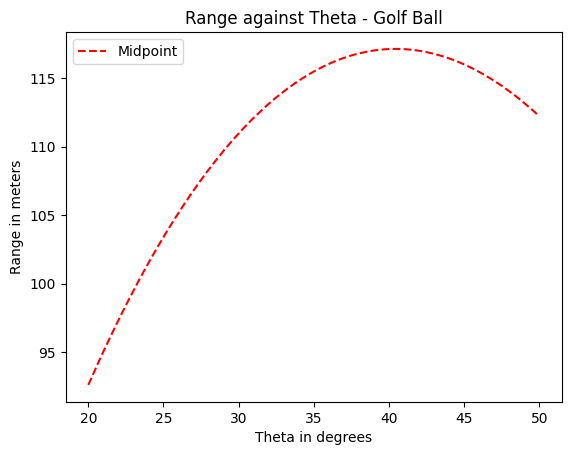

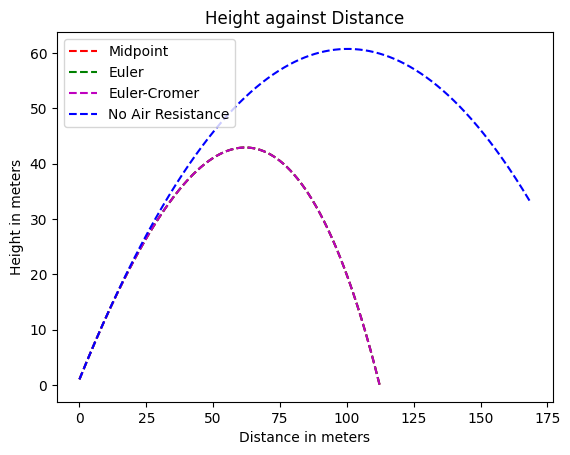

In [41]:
plt.plot(theta, rnge, 'r--', label="Midpoint")
plt.xlabel("Theta in degrees")
plt.ylabel("Range in meters")
plt.title("Range against Theta - Golf Ball")
plt.legend()
plt.show()

plt.plot(xplot, yplot, 'r--', label="Midpoint")
plt.plot(xplote, yplote, 'g--', label="Euler")
plt.plot(xplotec, yplotec, 'm--', label="Euler-Cromer")
plt.plot(xNoAir, yNoAir, 'b--', label="No Air Resistance")
plt.xlabel("Distance in meters")
plt.ylabel("Height in meters")
plt.title("Height against Distance")
plt.legend()
plt.show()